<a href="https://colab.research.google.com/github/JohnSRX/Machine-Learning-Portfolio/blob/Principal-Component-Analysis/PCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###load data and read csv

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/irisdata.csv")
df.head()


,sepal length,sepal width,petal length,petal width,"species (0: setosa, 1: versicolor, 2: virginica)"
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#check the data shape

In [ ]:
print(df.shape)

(150, 5)


In [ ]:
#format data for dataframe

In [ ]:
import numpy as np
labels = np.reshape(df, (150,5))
final_Iris_data=np.concatenate([df,labels],axis=1)
final_Iris_data.shape

(150, 10)

In [ ]:
#finalize change to dataset

In [ ]:
import pandas as pd
Iris_dataset = pd.DataFrame(final_Iris_data)

In [ ]:
#check the features of the data set

In [ ]:
features=df.columns
features

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species (0: setosa, 1: versicolor, 2: virginica)'],
      dtype='object')

In [ ]:
#this code is used to add labels to columns with missing ones

In [ ]:
features_labels=np.append(features,'label')
Iris_dataset.columns=features_labels
Iris_dataset.head()


TypeError: ignored

In [ ]:
#normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
x=Iris_dataset
x=StandardScaler().fit_transform(x) 
x.shape
np.mean(x), np.std(x)

(-1.8947806286936006e-16, 1.0)

In [ ]:
#convert to dataframe

In [ ]:
feat_cols=['features'+str(i) for i in range(x.shape[1])]
normalized_Iris=pd.DataFrame(x,columns=feat_cols)
normalized_Iris.head()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745,-1.021849,1.263460,-1.341272,-1.312977,-1.224745


In [ ]:
from sklearn.decomposition import PCA
pca_Iris=PCA(n_components=2)
principalComponents_Iris=pca_Iris.fit_transform(x)

In [ ]:
principal_Iris_DF=pd.DataFrame(data=principalComponents_Iris, columns=['principal component1', 'principal component2'])
principal_Iris_DF.head()

,principal component1,principal component2
0,-3.643293,0.705197
1,-3.421994,-0.934114
2,-3.765064,-0.461898
3,-3.685144,-0.824380
4,-3.794459,0.942367


In [ ]:
#component 1 holds 39.5% of the info, component 2 holds 17.8%

In [ ]:
print('Explained variation per principal component: {}'.format(pca_Iris.explained_variance_ratio_))

Explained variation per principal component: [0.76590853 0.18427757]


In [ ]:
#plot it

<Figure size 432x288 with 0 Axes>

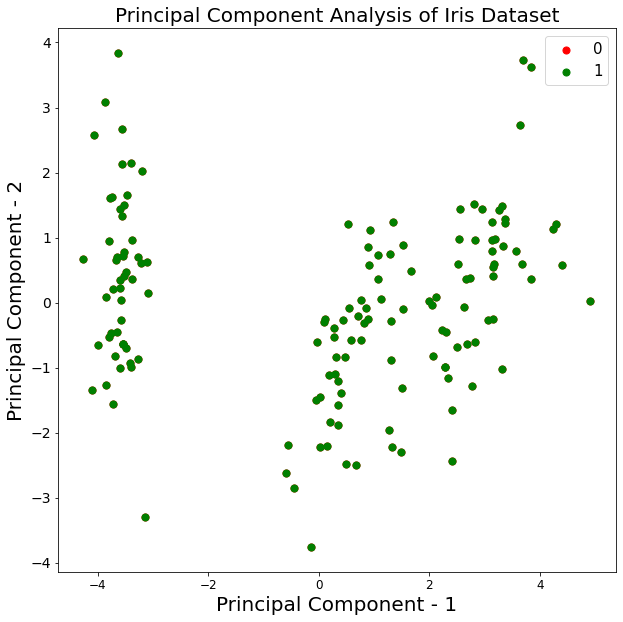

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    plt.scatter(principal_Iris_DF['principal component1']
               , principal_Iris_DF['principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

IndexError: ignored

<Figure size 432x288 with 0 Axes>

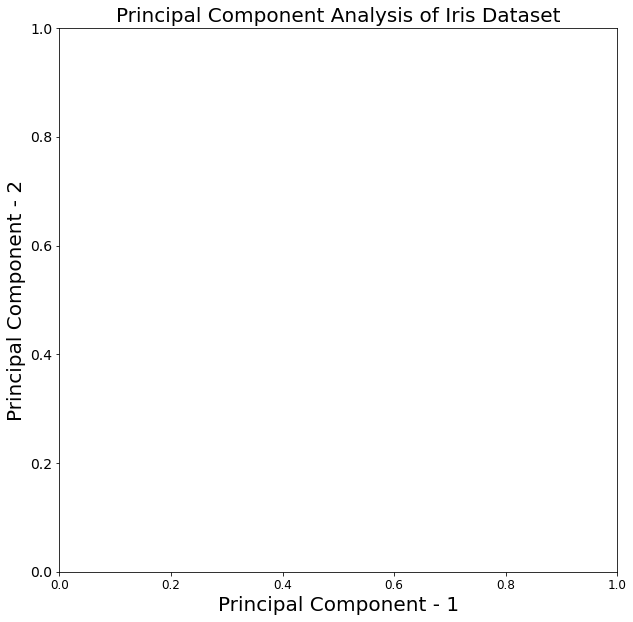

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = Iris_dataset.columns == target
    plt.scatter(principal_Iris_DF.loc[indicesToKeep, 'principal component1']
               , principal_Iris_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})